In [16]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import seaborn as sns
import pandas as pd
from hyperopt import hp, fmin, tpe, space_eval, STATUS_OK, Trials
import time

sns.set_theme(font_scale=1.7, style='whitegrid')

# Esercitazione 4

## 4.0 - Appunti e introduzione

- In `C++` esiste la libreria `openMP` o `MPI`: passaggio di istruzioni precise, thread per thread;
- `Numba` usa in automatico `openMP`, altrimenti possiamo selezionare un `backend` tra quelli disponibili (vedi sito);

#### GPU

Un botto di threads ma:
- alto consumo di potenza e temperature piu' alto;
- singolo thread molto piu' lento della CPU: si punta sulla quantita' e non sulla qualita';
- RAM molto limitata. Abbiamo un tetto max di  80Gb ad oggi. In certi casi questo risulta limitante: bisogna lavorare bene con la memoria (meglio ricalcolare che conservare?);
- difficile costruzione e compilatori ad hoc forniti dai costruttori.

TensorFlow ricorre alla GPU tramite `cuda`

#### Torniamo a Keras

- `model.compile` accetta anche le stringhe (in quel caso non posso passare argomenti);
- `history.history` e' un dizionario;
- `model.evaluate` calcola le metriche al tempo corrente;
- `model.predict` effettua la predizione $NN(input_{new})=output_{new}$

#### Hyperopt

Possiamo fare random search, SMBO o Adaptive TPE (tipicamente il secondo). 

In [4]:
# variabili di supporto per la ricerca

space = hp.uniform('x', -10, 10)

b = hp.choice('b', [1,2,3,4])
c = hp.loguniform('c', -5, 0)

In [6]:
# tutto il fit del modello scelto sta qua
def objective(x):
    return x**2

# mi salvo la combo migliore tra tutte: piu' vado vicino allo zero meglio e'
best = fmin(objective, space, algo=tpe.suggest, max_evals=100)
print(best)

100%|███| 100/100 [00:00<00:00, 580.04trial/s, best loss: 0.0013137379131258745]
{'x': 0.036245522663163166}


In [10]:
print(space_eval(space, best))

0.036245522663163166


In [17]:
# ma potrebbe interessarmi la grid completa, lo storico invece che la sola funzione in objective
def objective(x):
    return {'loss': x**2, 'status': STATUS_OK, 'eval_time': time.time()}

trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)
print(best)

100%|█████| 100/100 [00:00<00:00, 573.49trial/s, best loss: 0.00871063994575528]
{'x': -0.0933308091990811}


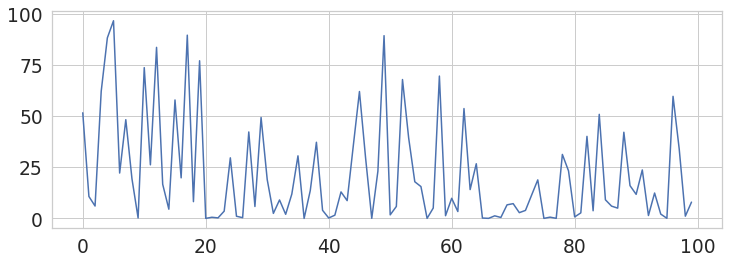

In [25]:
plt.figure(figsize=(12,4))
plt.plot(trials.losses())
plt.show()

Attenzione alla memoria. Questo approccio salva tutti i dati.